In [412]:
import numpy as np
import matplotlib.pyplot as plt

In [413]:
def calculate_posterior(sick_per_day, alpha, beta, samples):
    alpha_post = alpha + np.sum(sick_per_day)
    beta_post = beta + len(sick_per_day)

    posterior = np.random.gamma(alpha_post, 1/beta_post, size=samples)
        
    return posterior

In [414]:
def generate_visuals():
    alpha = 2
    beta = 2
    samples = 1000000
    days = [10, 20, 1000]
    lambda_true = 5

    sick_per_day_vector = []
    posterior_vector = []
    for day in days:
        sick_per_day = np.random.poisson(lam=lambda_true, size=day)
        sick_per_day_vector.append(sick_per_day)
        posterior = calculate_posterior(sick_per_day, alpha, beta, samples=samples)
        posterior_vector.append(posterior)

    prior = np.random.gamma(alpha, 1/beta, size=samples)

    fig, axs = plt.subplots(2, 2, figsize=(12, 9))

    axs[0, 0].hist(prior, bins=50, color='blue', alpha=0.5, label='Prior')
    axs[0, 0].hist(posterior_vector[1], bins=50, color='red', alpha=0.5, label='Posterior')
    axs[0, 0].legend()
    axs[0, 0].set_title('days=20')
    axs[0, 0].set_xlabel('lambda')
    axs[0, 0].set_ylabel('Samples')

    for i, day in enumerate(days):
        x = (i+1) % 2
        y = (i+1) // 2

        n, bins, patches = axs[y, x].hist(posterior_vector[i], bins=50, color='red', alpha=0.5, label='Posterior')
        axs[y, x].vlines(x=lambda_true, ymin=0, ymax=n.max(), color='black', label='lambda True')
        axs[y, x].vlines(x=np.mean(posterior_vector[i]), ymin=0, ymax=n.max(), color='green', label='posterior Mean')
        axs[y, x].text(0.5, 0.5, f'Mean={np.mean(posterior_vector[i]):.2f}', horizontalalignment='center', verticalalignment='center', transform=axs[y, x].transAxes)
        axs[y, x].legend()
        axs[y, x].set_title(f'days={day}')
        axs[y, x].set_xticks(np.arange(7))
        axs[y, x].set_xlabel('lambda')
        axs[y, x].set_ylabel('Samples')
    plt.show()
        



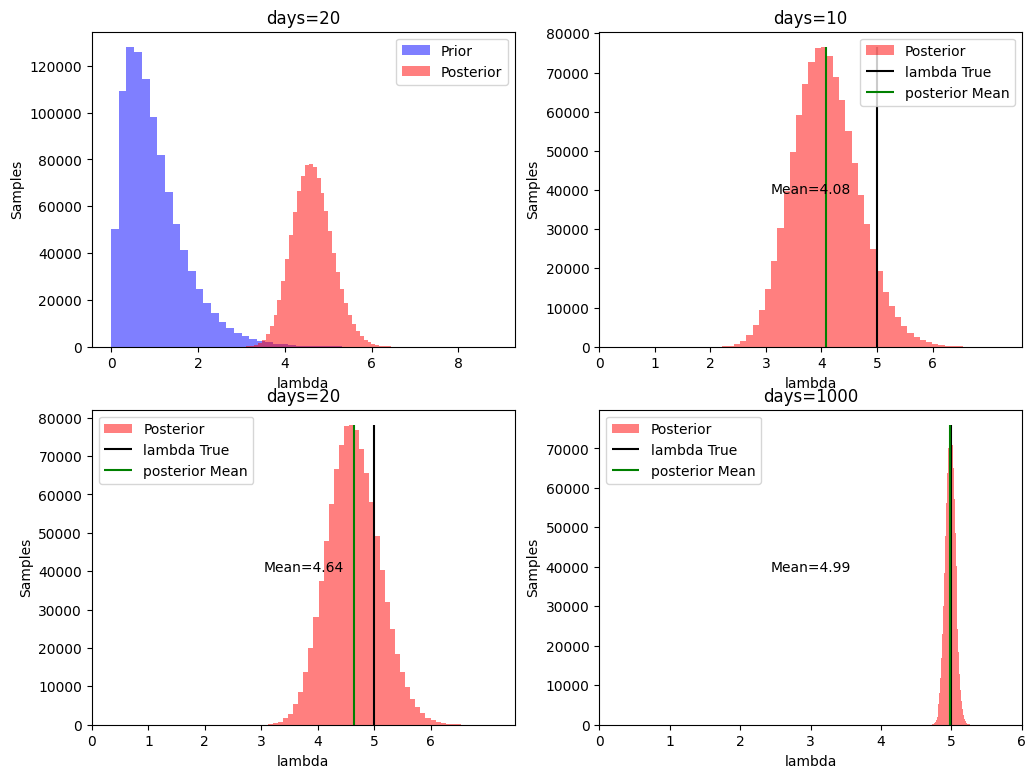

In [415]:
generate_visuals()